# ML - Project - ECG ARR - Marlon van Zijl/Anthony Dai


## Packages

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from collections import Counter

## Data aquisition



Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Create path to csv files

In [ ]:
data_path = '/content/drive/MyDrive/ML_project/'
Input1 = pd.read_csv(data_path + 'val_data.csv', header=None)
Input2 = pd.read_csv(data_path + 'train_data.csv', header=None)
Input3 = pd.read_csv(data_path + 'test_data.csv', header=None)
Input4 = pd.read_csv(data_path + 'beats_nsvfq_48p.csv', header=None)

val_data = pd.DataFrame(Input1)
train_data = pd.DataFrame(Input2)
test_data = pd.DataFrame(Input3)
beats_data = pd.DataFrame(Input4)

In [ ]:
val_data

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,-0.500,-0.475,-0.460,-0.430,-0.440,-0.425,-0.445,-0.430,-0.415,-0.420,...,-0.510,-0.500,-0.510,-0.530,-0.540,-0.550,-0.565,-0.580,-0.585,3.0
1,-0.105,-0.105,-0.110,-0.110,-0.105,-0.115,-0.130,-0.130,-0.110,-0.100,...,-0.060,-0.025,0.000,0.025,0.015,0.000,-0.040,-0.060,-0.060,0.0
2,0.000,-0.020,-0.015,-0.020,-0.025,-0.010,-0.005,-0.030,-0.035,-0.025,...,-0.065,-0.050,-0.065,-0.055,-0.045,-0.050,-0.050,-0.060,-0.050,0.0
3,-0.390,-0.380,-0.390,-0.395,-0.400,-0.385,-0.375,-0.355,-0.345,-0.365,...,-0.320,-0.310,-0.310,-0.320,-0.325,-0.325,-0.320,-0.310,-0.320,1.0
4,-0.205,-0.210,-0.210,-0.190,-0.195,-0.195,-0.205,-0.210,-0.205,-0.200,...,-0.160,-0.155,-0.145,-0.135,-0.145,-0.150,-0.150,-0.155,-0.145,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21886,-0.255,-0.240,-0.230,-0.230,-0.235,-0.255,-0.270,-0.270,-0.265,-0.250,...,-0.205,-0.190,-0.175,-0.175,-0.165,-0.170,-0.165,-0.130,-0.130,0.0
21887,0.020,0.055,0.070,0.090,0.105,0.095,0.115,0.140,0.155,0.145,...,-0.270,-0.255,-0.260,-0.275,-0.290,-0.315,-0.305,-0.285,-0.310,12.0
21888,-0.135,-0.135,-0.150,-0.175,-0.180,-0.170,-0.150,-0.145,-0.130,-0.125,...,-0.070,-0.075,-0.090,-0.100,-0.095,-0.090,-0.075,-0.070,-0.075,0.0
21889,-0.070,-0.075,-0.080,-0.080,-0.070,-0.070,-0.070,-0.090,-0.085,-0.070,...,-0.135,-0.145,-0.145,-0.110,-0.105,-0.105,-0.130,-0.125,-0.115,0.0


In [ ]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,-0.265,-0.265,-0.290,-0.310,-0.325,-0.315,-0.295,-0.280,-0.285,-0.280,...,-0.170,-0.145,-0.155,-0.170,-0.180,-0.185,-0.190,-0.190,-0.200,0.0
1,-0.110,-0.110,-0.105,-0.095,-0.080,-0.050,-0.050,-0.050,-0.050,-0.040,...,-0.315,-0.285,-0.275,-0.265,-0.260,-0.275,-0.290,-0.280,-0.275,12.0
2,-0.380,-0.380,-0.400,-0.415,-0.395,-0.380,-0.380,-0.395,-0.390,-0.415,...,-0.390,-0.410,-0.445,-0.435,-0.420,-0.415,-0.400,-0.410,-0.425,0.0
3,-0.955,-0.945,-0.960,-0.960,-0.970,-0.970,-0.955,-0.935,-0.940,-0.920,...,-0.995,-1.000,-1.010,-1.040,-1.040,-1.025,-1.020,-1.000,-0.990,0.0
4,0.030,0.030,0.055,0.060,0.040,0.030,0.035,0.040,0.060,0.050,...,-0.010,0.000,-0.005,-0.025,-0.015,-0.020,-0.015,0.010,0.005,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65665,-0.035,-0.015,0.005,0.000,0.000,-0.005,-0.015,-0.025,-0.040,-0.050,...,-0.065,-0.045,-0.050,-0.060,-0.075,-0.080,-0.070,-0.060,-0.090,2.0
65666,-0.245,-0.245,-0.250,-0.235,-0.235,-0.255,-0.260,-0.270,-0.255,-0.235,...,-0.360,-0.370,-0.355,-0.370,-0.380,-0.390,-0.395,-0.380,-0.380,13.0
65667,-0.375,-0.390,-0.400,-0.400,-0.370,-0.370,-0.375,-0.385,-0.385,-0.380,...,-0.410,-0.395,-0.375,-0.370,-0.380,-0.375,-0.390,-0.395,-0.385,0.0
65668,-0.630,-0.640,-0.655,-0.640,-0.625,-0.605,-0.585,-0.585,-0.585,-0.585,...,-0.730,-0.730,-0.745,-0.755,-0.740,-0.730,-0.715,-0.710,-0.715,3.0


In [ ]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,-0.210,-0.210,-0.210,-0.210,-0.215,-0.220,-0.235,-0.225,-0.215,-0.210,...,-0.240,-0.230,-0.235,-0.250,-0.255,-0.255,-0.235,-0.220,-0.210,0.0
1,0.010,0.015,0.000,0.005,-0.005,0.005,0.015,0.020,0.020,0.010,...,-0.005,-0.005,-0.010,0.005,0.010,0.035,0.050,0.060,0.050,13.0
2,-0.075,-0.060,-0.050,-0.060,-0.070,-0.070,-0.075,-0.060,-0.060,-0.060,...,-0.085,-0.090,-0.090,-0.080,-0.090,-0.090,-0.080,-0.080,-0.070,0.0
3,-0.395,-0.400,-0.400,-0.430,-0.440,-0.425,-0.415,-0.415,-0.440,-0.440,...,-0.200,-0.230,-0.255,-0.280,-0.295,-0.285,-0.285,-0.310,-0.325,1.0
4,-0.935,-0.935,-0.935,-0.930,-0.925,-0.915,-0.910,-0.915,-0.910,-0.930,...,-0.990,-1.000,-1.015,-1.030,-1.045,-1.065,-1.060,-1.060,-1.050,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21886,-0.320,-0.285,-0.280,-0.260,-0.240,-0.220,-0.225,-0.230,-0.225,-0.215,...,-0.320,-0.320,-0.310,-0.310,-0.315,-0.315,-0.315,-0.330,-0.320,3.0
21887,-0.455,-0.485,-0.495,-0.505,-0.515,-0.540,-0.570,-0.605,-0.615,-0.615,...,0.100,0.065,0.040,0.015,-0.030,-0.085,-0.135,-0.165,-0.175,1.0
21888,-0.415,-0.405,-0.390,-0.400,-0.410,-0.420,-0.420,-0.390,-0.380,-0.390,...,-0.320,-0.310,-0.305,-0.315,-0.315,-0.310,-0.305,-0.280,-0.285,3.0
21889,-0.825,-0.765,-0.745,-0.740,-0.695,-0.675,-0.660,-0.655,-0.620,-0.555,...,-0.515,-0.530,-0.545,-0.570,-0.590,-0.660,-0.685,-0.690,-0.645,3.0


Filtered Training Set:
(65668, 250) (65668,)

Filtered Validation Set:
(21891, 250) (21891,)

Filtered Test Set:
(21891, 250) (21891,)


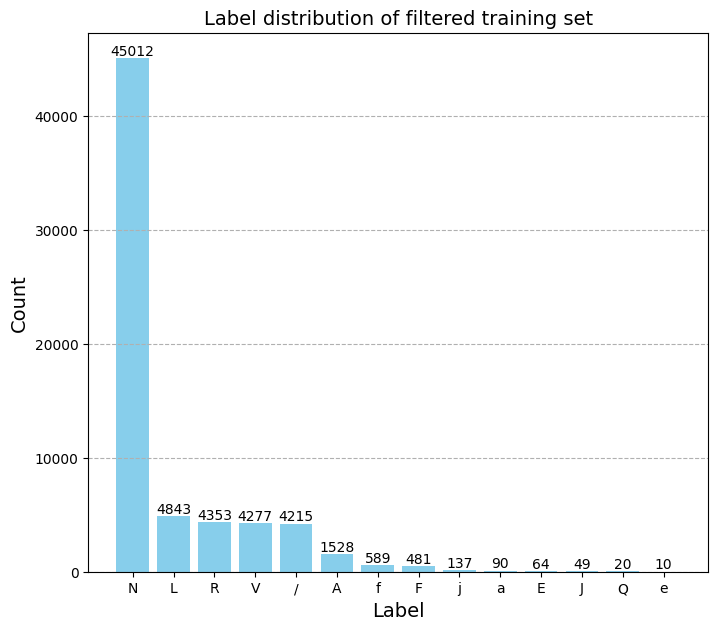

In [ ]:
X_train = train_data.iloc[:, :-1].to_numpy()
y_train = train_data.iloc[:, -1].to_numpy()

X_test = test_data.iloc[:, :-1].to_numpy()
y_test = test_data.iloc[:, -1].to_numpy()

X_val = val_data.iloc[:, :-1].to_numpy()
y_val = val_data.iloc[:, -1].to_numpy()

# Concatenate y arrays to count occurrences
combined_classes = np.concatenate((y_train, y_val, y_test))

# Set minimum occurrences threshold
min_occurrences = 10

# Count occurrences of each class
unique_classes, counts = np.unique(combined_classes, return_counts=True)

# Determine classes to keep
classes_to_keep = unique_classes[counts >= min_occurrences]

# Filter each dataset based on classes to keep
train_filter = np.isin(y_train, classes_to_keep)
val_filter = np.isin(y_val, classes_to_keep)
test_filter = np.isin(y_test, classes_to_keep)

X_train_filtered = X_train[train_filter]
y_train_filtered = y_train[train_filter]

X_val_filtered = X_val[val_filter]
y_val_filtered = y_val[val_filter]

X_test_filtered = X_test[test_filter]
y_test_filtered = y_test[test_filter]

# Print results
print("Filtered Training Set:")
print(X_train_filtered.shape, y_train_filtered.shape)

print("\nFiltered Validation Set:")
print(X_val_filtered.shape, y_val_filtered.shape)

print("\nFiltered Test Set:")
print(X_test_filtered.shape, y_test_filtered.shape)


# Count occurrences of each label
label_counts = Counter(y_train_filtered)

# Extract the labels and their counts
unique_labels = list(label_counts.keys())
counts = list(label_counts.values())
num_to_class = {0: 'N', 1: '/', 2: 'L', 3: 'R', 4: 'e', 5: 'j', 6: 'A', 7: 'a',
                 8: 'J', 9: 'S', 10: 'E', 11: 'F', 12: 'V', 13: 'f', 14: 'Q'}
unique_labels_letters = [num_to_class.get(num, num) for num in unique_labels]

# Descending order
sorted_indices = np.argsort(counts)[::-1]  # Get indices of sorted values in descending order
unique_labels_letters = [unique_labels_letters[i] for i in sorted_indices]
counts = [counts[i] for i in sorted_indices]

# Create the bar plot
plt.figure(figsize=(8, 7))
bars = plt.bar(unique_labels_letters, counts, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
             ha='center', va='bottom')

# Set the x-axis labels to letters
plt.xticks(ticks=range(len(unique_labels)))

plt.title('Label distribution of filtered training set', fontsize=14)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--')

# Display the plot
plt.show()

X_train = X_train[train_filter]
y_train = y_train[train_filter]

X_val = X_val[val_filter]
y_val = y_val[val_filter]

X_test = X_test[test_filter]
y_test = y_test[test_filter]

Plotting a random instance of all the data

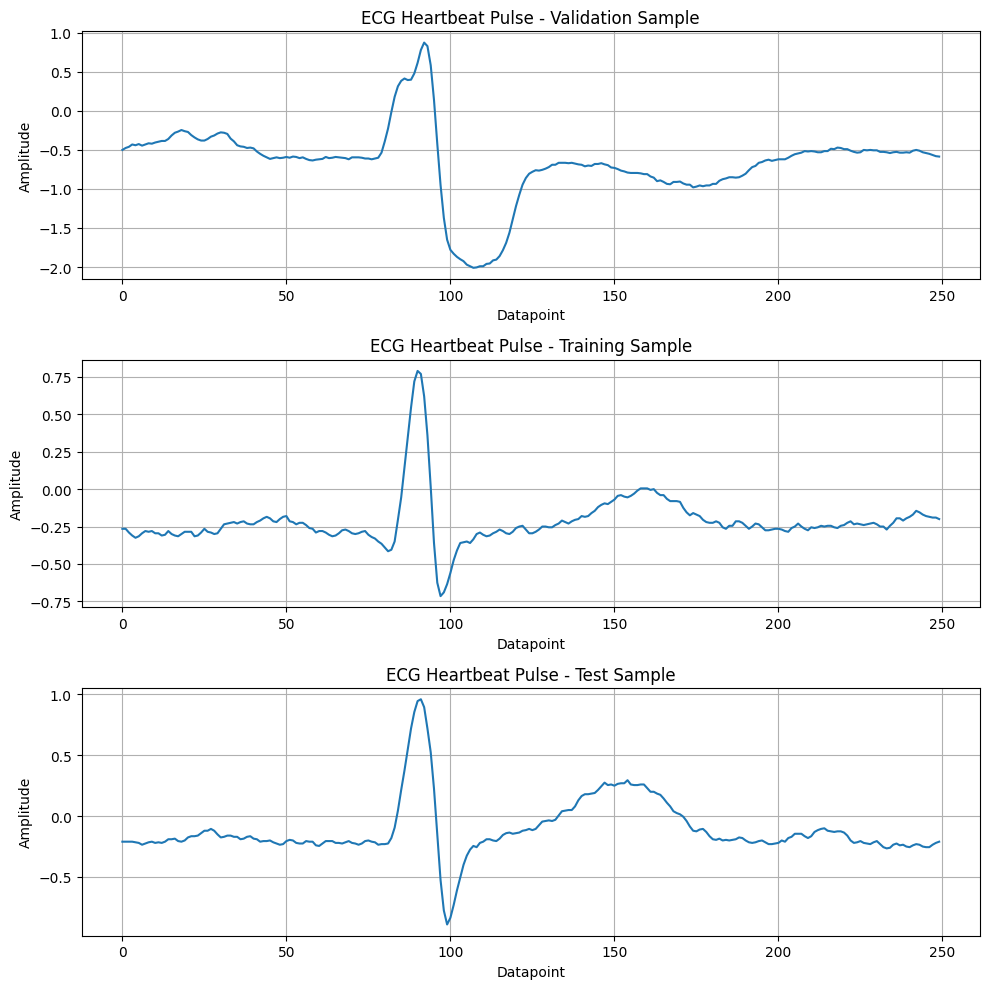

In [ ]:
import matplotlib.pyplot as plt

# Assuming X_val, X_train, X_test are numpy arrays with shape (n_samples, 251)
val_sample = X_val[0]
train_sample = X_train[0]
test_sample = X_test[0]

# Create a figure with 3 subplots, one for each sample
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Plot the validation sample
axs[0].plot(val_sample)
axs[0].set_title("ECG Heartbeat Pulse - Validation Sample")
axs[0].set_xlabel("Datapoint")
axs[0].set_ylabel("Amplitude")
axs[0].grid(True)

# Plot the training sample
axs[1].plot(train_sample)
axs[1].set_title("ECG Heartbeat Pulse - Training Sample")
axs[1].set_xlabel("Datapoint")
axs[1].set_ylabel("Amplitude")
axs[1].grid(True)

# Plot the test sample
axs[2].plot(test_sample)
axs[2].set_title("ECG Heartbeat Pulse - Test Sample")
axs[2].set_xlabel("Datapoint")
axs[2].set_ylabel("Amplitude")
axs[2].grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


## Scaling + PCA


In [ ]:
# compute scaling with train and transform val and test with train scaler
# to ensure no influence of test/val data on the training of the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

n_components = 8
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)

X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(X_train_pca.shape)
print(y_train.shape)

(65668, 8)
(65668,)


Number of components explaining 95% variance: 8
Number of components explaining 90% variance: 5


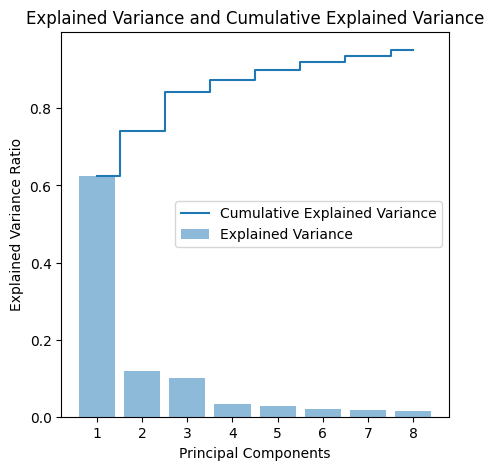

In [ ]:
explained_variance = pca.explained_variance_ratio_[:20]
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(5, 5))

plt.bar(range(1, n_components + 1), explained_variance, alpha=0.5, align='center', label='Explained Variance')
plt.step(range(1, n_components + 1), cumulative_variance, where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance and Cumulative Explained Variance')
plt.legend(loc='best')

n_components_95 = (cumulative_variance >= 0.95).argmax() + 1
n_components_90 = (cumulative_variance >= 0.90).argmax() + 1

# Print the number of components for 95% and 90% variance
print(f"Number of components explaining 95% variance: {n_components_95}")
print(f"Number of components explaining 90% variance: {n_components_90}")


## Training model

Function for plotting performance metrics + confusion matrix

In [ ]:
def Classifier(clf, x_train, y_train, x_test, y_test, title=None):
    # Fit the model
    clf.fit(x_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(x_test)

     # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro')
    precision_weighted = precision_score(y_test, y_pred, average='weighted')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    recall_weighted = recall_score(y_test, y_pred, average='weighted')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')

    # Print the evaluation scores in the specified order
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Macro): {precision_macro:.4f}")
    print(f"Recall (Macro): {recall_macro:.4f}")
    print(f"F1 Score (Macro): {f1_macro:.4f}")
    print(f"Precision (Weighted): {precision_weighted:.4f}")
    print(f"Recall (Weighted): {recall_weighted:.4f}")
    print(f"F1 Score (Weighted): {f1_weighted:.4f}")

    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap using Seaborn

    num_to_class = {0: 'N', 1: '/', 2: 'L', 3: 'R', 4: 'e', 5: 'j', 6: 'A', 7: 'a',
                 8: 'J', 9: 'S', 10: 'E', 11: 'F', 12: 'V', 13: 'f', 14: 'Q'}
    y_test_letters = [num_to_class.get(num, num) for num in np.unique(y_test)]


    sn.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_test_letters, yticklabels=y_test_letters)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title if title else 'Confusion Matrix')
    plt.show()

In [ ]:
n_neighbours = 5
p = 1
### k-NN
knn_clf = KNeighborsClassifier(n_neighbors=n_neighbours, p = 1)

In [ ]:
title = f'k-NN, p = {p}, neighbours = {n_neighbours}, raw data'
Classifier(knn_clf, X_train_scaled, y_train, X_test_scaled, y_test, title=title)

Accuracy: 0.9531
Precision (Macro): 0.6171
Recall (Macro): 0.6565
F1 Score (Macro): 0.6337
Precision (Weighted): 0.9581
Recall (Weighted): 0.9531
F1 Score (Weighted): 0.9550


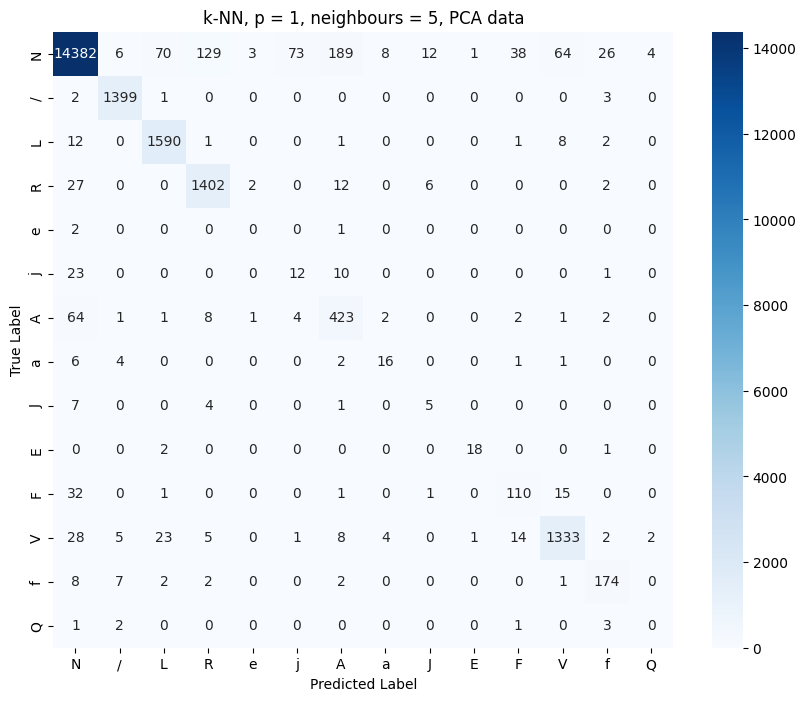

In [ ]:
title = f'k-NN, p = {p}, neighbours = {n_neighbours}, PCA data'
Classifier(knn_clf, X_train_pca, y_train, X_test_pca, y_test, title=title)

## CNN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Assuming X_train, X_val, X_test, y_train, y_val, y_test are your datasets
# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).unsqueeze(1)  # Add channel dimension (N, 1, 250)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for train, validation, and test sets
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Training the Model
def train(model, train_loader, val_loader, criterion, optimizer, num_epochs=1):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validation after each epoch
        val_loss, val_acc = validate(model, val_loader, criterion)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

# Validation Function
def validate(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return val_loss / len(val_loader), correct / total

# Testing the Model
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Test Accuracy: {correct / total:.4f}")

def nn_classifier(model, test_loader, title=None):
    model.eval()  # Set model to evaluation mode

    y_true = []
    y_pred = []

    with torch.no_grad():
        # Iterate over test data
        for inputs, labels in test_loader:
            # Forward pass to get outputs
            outputs = model(inputs)

            # Get the predicted class (highest probability)
            _, predicted = torch.max(outputs, 1)

            y_true.extend(labels.numpy())  # Convert to NumPy for evaluation
            y_pred.extend(predicted.numpy())

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision_macro = precision_score(y_true, y_pred, average='macro')
    precision_weighted = precision_score(y_true, y_pred, average='weighted')
    recall_macro = recall_score(y_true, y_pred, average='macro')
    recall_weighted = recall_score(y_true, y_pred, average='weighted')
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')

    # Print the evaluation scores in the specified order
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Macro): {precision_macro:.4f}")
    print(f"Recall (Macro): {recall_macro:.4f}")
    print(f"F1 Score (Macro): {f1_macro:.4f}")
    print(f"Precision (Weighted): {precision_weighted:.4f}")
    print(f"Recall (Weighted): {recall_weighted:.4f}")
    print(f"F1 Score (Weighted): {f1_weighted:.4f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    num_to_class = {0: 'N', 1: '/', 2: 'L', 3: 'R', 4: 'e', 5: 'j', 6: 'A', 7: 'a',
                 8: 'J', 9: 'S', 10: 'E', 11: 'F', 12: 'V', 13: 'f', 14: 'Q'}
    y_test_letters = [num_to_class.get(num, num) for num in np.unique(y_test)]
    sn.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_test_letters, yticklabels=y_test_letters)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title if title else 'Confusion Matrix')
    plt.show()

CNN model 1:

1.   2 conv layers
2.   2 pooling layers
3.   pooling size = 2
4.   kernel sizes = [5 , 3]
5.   2 dense layers
6.   Neurons = [128 15(output)]
7.   0 dropout layers
8.   1 flatten layer



In [ ]:
# CNN Model Definition
class ECGCNN1(nn.Module):
    def __init__(self):
        super(ECGCNN1, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64*62, 128)  # Adjust the size based on the feature map size
        self.fc2 = nn.Linear(128, 15)  # Output layer for 15 classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # (N, 32, 250) -> (N, 32, 125)
        x = self.pool(torch.relu(self.conv2(x)))  # (N, 64, 125) -> (N, 64, 62)
        x = x.view(x.size(0), -1)  # Flatten (N, 64 * 62)
        x = torch.relu(self.fc1(x))  # Fully connected layer
        x = self.fc2(x)  # Output layer with 15 outputs (one per class)
        return x

In [ ]:
# Initialize model, loss function, and optimizer
model1 = ECGCNN1()
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)

# Run the training and evaluation
train(model1, train_loader, val_loader, criterion, optimizer1, num_epochs=1)
test(model1, test_loader)

Epoch [1/1], Loss: 0.2004, Val Loss: 0.1230, Val Acc: 0.9717
Test Accuracy: 0.9720


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9720
Precision (Macro): 0.6787
Recall (Macro): 0.5946
F1 Score (Macro): 0.6180
Precision (Weighted): 0.9682
Recall (Weighted): 0.9720
F1 Score (Weighted): 0.9691


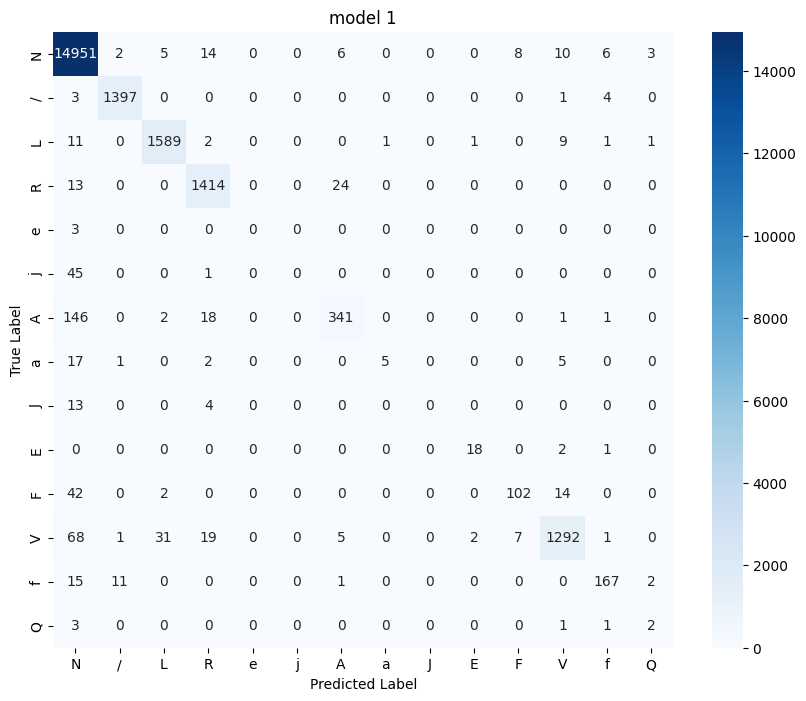

In [ ]:
# Assuming your model is trained and you have a DataLoader for the test data
nn_classifier(model1, test_loader, title="model 1")

CNN_2:

1.   4 conv layers
2.   4 pooling layers
3.   pooling size = 2
4.   kernel sizes = [5 ,3 ,3 ,3]
5.   2 dense layers
6.   neurons = [128 15(output)]
7.   0 dropout layers
8.   1 flatten layer


In [ ]:
# CNN Model Definition with 4 Convolutional Layers
class ECGCNN2(nn.Module):
    def __init__(self):
        super(ECGCNN2, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2)  # Output: (N, 32, 250)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)  # Output: (N, 64, 250)
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)  # Output: (N, 128, 250)
        self.conv4 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)  # Output: (N, 256, 250)

        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)  # Pooling after convolutions

        # The output size after conv + pool layers will be calculated
        self.fc1_input_size = 256 * (250 // 2 // 2 // 2 // 2)  # 4 pooling layers, each halves the size
        self.fc1 = nn.Linear(self.fc1_input_size, 128)  # Adjusted based on the output from the conv layers
        self.fc2 = nn.Linear(128, 15)  # Output layer for 15 classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # (N, 1, 250) -> (N, 32, 125)
        x = self.pool(torch.relu(self.conv2(x)))  # (N, 32, 125) -> (N, 64, 62)
        x = self.pool(torch.relu(self.conv3(x)))  # (N, 64, 62) -> (N, 128, 31)
        x = self.pool(torch.relu(self.conv4(x)))  # (N, 128, 31) -> (N, 256, 15)

        x = x.view(x.size(0), -1)  # Flatten (N, 256 * 15)
        x = torch.relu(self.fc1(x))  # Fully connected layer
        x = self.fc2(x)  # Output layer with 15 outputs (one per class)
        return x


In [ ]:
# Initialize model, loss function, and optimizer
model2 = ECGCNN2()
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)

# Train and evaluate the model
train(model2, train_loader, val_loader, criterion, optimizer2, num_epochs=1)
test(model2, test_loader)

Epoch [1/1], Loss: 0.1906, Val Loss: 0.1058, Val Acc: 0.9715
Test Accuracy: 0.9710


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9710
Precision (Macro): 0.7041
Recall (Macro): 0.5869
F1 Score (Macro): 0.6152
Precision (Weighted): 0.9694
Recall (Weighted): 0.9710
F1 Score (Weighted): 0.9684


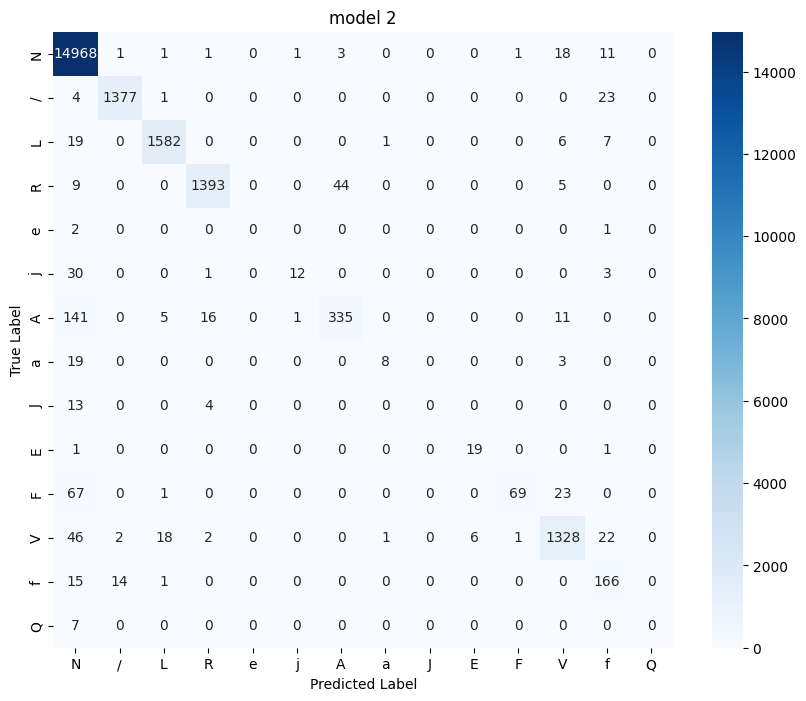

In [ ]:
nn_classifier(model2, test_loader, title="model 2")

CNN_3:

1.   2 conv layers
2.   2 pooling layers
3.   pooling size = 2
4.   kernel sizes = [5 ,3]
5.   4 dense layers
6.   Neurons = [64 128 256 15(output)]
7.   0 dropout layers
8.   1 flatten layer


In [ ]:
# CNN Model Definition
class ECGCNN3(nn.Module):
    def __init__(self):
        super(ECGCNN3, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2)  # Output: (N, 32, 250)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)  # Output: (N, 64, 250)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)  # Pooling layer

        # Adjust the input size for the first fully connected layer
        self.fc1_input_size = 64 * (250 // 2 // 2)  # Calculate the flattened size after conv + pool layers
        self.fc1 = nn.Linear(self.fc1_input_size, 64)  # First Dense Layer with 64 neurons
        self.fc2 = nn.Linear(64, 128)                  # Second Dense Layer with 128 neurons
        self.fc3 = nn.Linear(128, 256)                 # Third Dense Layer with 256 neurons
        self.fc4 = nn.Linear(256, 15)                  # Output Layer with 15 classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # (N, 1, 250) -> (N, 32, 125)
        x = self.pool(torch.relu(self.conv2(x)))  # (N, 32, 125) -> (N, 64, 62)
        x = x.view(x.size(0), -1)                  # Flatten (N, 64 * 62)
        x = torch.relu(self.fc1(x))                 # Fully connected layer with 64 neurons
        x = torch.relu(self.fc2(x))                 # Fully connected layer with 128 neurons
        x = torch.relu(self.fc3(x))                 # Fully connected layer with 256 neurons
        x = self.fc4(x)                             # Output layer with 15 outputs (one per class)
        return x

In [ ]:
# Initialize model, loss function, and optimizer
model3 = ECGCNN3()
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer3 = optim.Adam(model3.parameters(), lr=0.001)

# Train and evaluate the model
train(model3, train_loader, val_loader, criterion, optimizer3, num_epochs=1)
test(model3, test_loader)

Epoch [1/1], Loss: 0.2171, Val Loss: 0.1294, Val Acc: 0.9651
Test Accuracy: 0.9664


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9664
Precision (Macro): 0.6163
Recall (Macro): 0.5008
F1 Score (Macro): 0.5377
Precision (Weighted): 0.9642
Recall (Weighted): 0.9664
F1 Score (Weighted): 0.9631


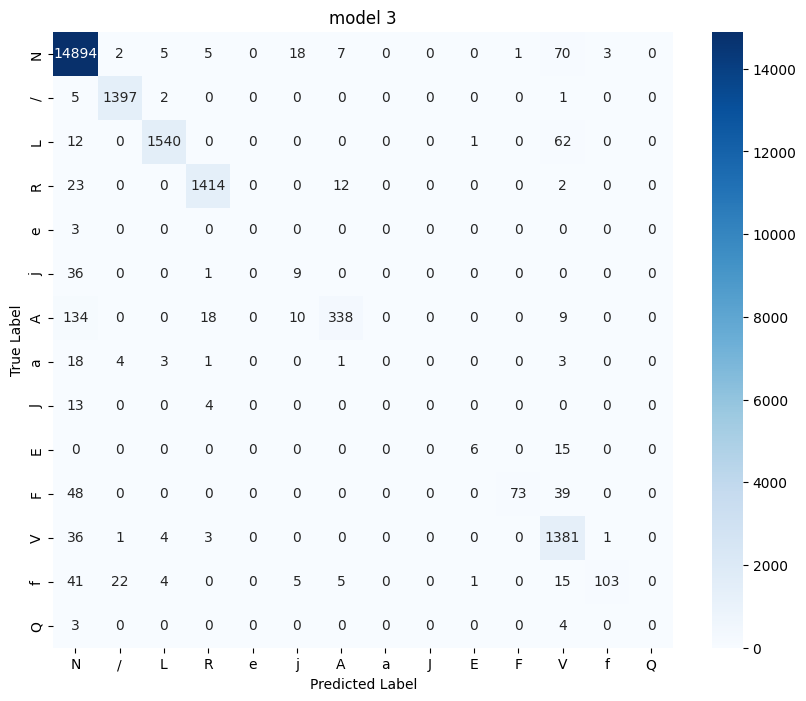

In [ ]:
nn_classifier(model3, test_loader, title="model 3")

CNN_4:

1.   2 conv layers
2.   2 pooling layers
3.   pooling size = 2
4.   kernel sizes = [5 ,3]
5.   4 dense layers
6.   Neurons = [64 15(output)]
7.   1 dropout layers
8.   1 flatten layer

In [ ]:
# CNN Model Definition with Dropout
class ECGCNN4(nn.Module):
    def __init__(self):
        super(ECGCNN4, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 62, 128)  # Adjust the size based on the feature map size
        self.dropout = nn.Dropout(p=0.2)  # Dropout layer with a probability of 50%
        self.fc2 = nn.Linear(128, 15)  # Output layer for 15 classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # (N, 32, 250) -> (N, 32, 125)
        x = self.pool(torch.relu(self.conv2(x)))  # (N, 64, 125) -> (N, 64, 62)
        x = x.view(x.size(0), -1)  # Flatten (N, 64 * 62)
        x = torch.relu(self.fc1(x))  # Fully connected layer
        x = self.dropout(x)  # Apply dropout
        x = self.fc2(x)  # Output layer with 15 outputs (one per class)
        return x


In [ ]:
# Initialize model, loss function, and optimizer
model4 = ECGCNN4()
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer4 = optim.Adam(model4.parameters(), lr=0.001)

# Train and evaluate the model
train(model4, train_loader, val_loader, criterion, optimizer4, num_epochs=1)
test(model4, test_loader)

Epoch [1/1], Loss: 0.2194, Val Loss: 0.1158, Val Acc: 0.9713
Test Accuracy: 0.9707


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9707
Precision (Macro): 0.7076
Recall (Macro): 0.5477
F1 Score (Macro): 0.5812
Precision (Weighted): 0.9679
Recall (Weighted): 0.9707
F1 Score (Weighted): 0.9675


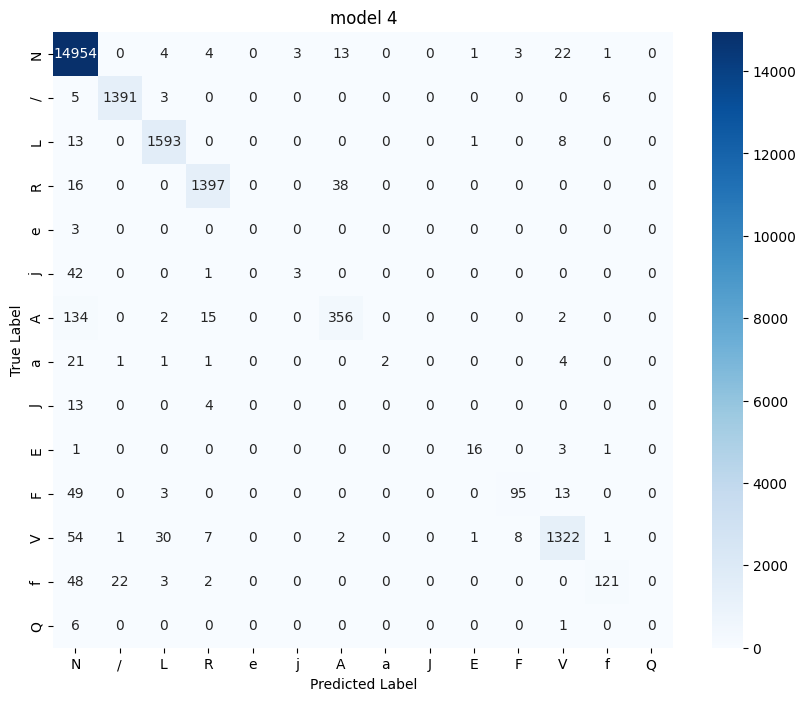

In [ ]:
nn_classifier(model4, test_loader, title="model 4")

CNN paper:

1.   2 conv layers
2.   2 pooling layers
3.   pooling size = 2
4.   kernel sizes = [5 ,3]
5.   4 dense layers
6.   Neurons = [64 15(output)]
7.   1 dropout layers
8.   1 flatten layer

In [ ]:
import torch
import torch.nn as nn

# CNN Model Definition based on the paper, modified to have one conv layer per block
class ECGCNN5(nn.Module):
    def __init__(self, input_length):
        super(ECGCNN5, self).__init__()

        self.input_length = input_length  # Length of the input signal

        # Block A
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=128, kernel_size=10, stride=1, padding=5)
        self.batch_norm1 = nn.BatchNorm1d(128)
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.2)

        # Block B
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=128, kernel_size=10, stride=1, padding=5)
        self.batch_norm2 = nn.BatchNorm1d(128)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.dropout2 = nn.Dropout(0.2)

        # Block C
        self.conv3 = nn.Conv1d(in_channels=128, out_channels=128, kernel_size=10, stride=1, padding=5)
        self.batch_norm3 = nn.BatchNorm1d(128)
        self.pool3 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.dropout3 = nn.Dropout(0.2)

        # Initialize fully connected layers after calculating the feature map size
        self.fc1 = None  # Will be initialized in a separate method
        self.dropout_fc = nn.Dropout(0.2)
        self.fc2 = nn.Linear(512, 15)  # Output layer for 15 classes

        # Calculate output size for fully connected layers
        self._initialize_fc_layers()

    def _initialize_fc_layers(self):
        # Create a dummy input to calculate the output size
        dummy_input = torch.zeros(1, 1, self.input_length)  # (batch_size, channels, length)
        x = self.forward_conv_layers(dummy_input)
        num_features = x.numel()  # Total number of features after flattening
        self.fc1 = nn.Linear(num_features, 512)  # Initialize fc1 with dynamic input size

    def forward_conv_layers(self, x):
        # Forward pass through convolutional layers
        x = torch.relu(self.conv1(x))
        x = self.batch_norm1(x)
        x = self.pool1(x)
        x = self.dropout1(x)

        x = torch.relu(self.conv2(x))
        x = self.batch_norm2(x)
        x = self.pool2(x)
        x = self.dropout2(x)

        x = torch.relu(self.conv3(x))
        x = self.batch_norm3(x)
        x = self.pool3(x)
        x = self.dropout3(x)

        return x

    def forward(self, x):
        x = self.forward_conv_layers(x)  # Pass through convolutional layers

        # Flatten and Fully Connected Layers
        x = x.view(x.size(0), -1)  # Flatten the feature map
        x = torch.relu(self.fc1(x))
        x = self.dropout_fc(x)
        x = self.fc2(x)  # Output layer for 15 classes

        return x

In [ ]:
# Initialize model, loss function, and optimizer
model5 = ECGCNN5(input_length=251)
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer5 = optim.Adam(model5.parameters(), lr=0.001)

# Train and evaluate the model
train(model5, train_loader, val_loader, criterion, optimizer5, num_epochs=10)
test(model5, test_loader)

Epoch [1/10], Loss: 0.1681, Val Loss: 0.0797, Val Acc: 0.9815
Epoch [2/10], Loss: 0.0699, Val Loss: 0.0701, Val Acc: 0.9831
Epoch [3/10], Loss: 0.0543, Val Loss: 0.0706, Val Acc: 0.9830
Epoch [4/10], Loss: 0.0425, Val Loss: 0.0555, Val Acc: 0.9863
Epoch [5/10], Loss: 0.0334, Val Loss: 0.0866, Val Acc: 0.9807
Epoch [6/10], Loss: 0.0301, Val Loss: 0.0717, Val Acc: 0.9847
Epoch [7/10], Loss: 0.0237, Val Loss: 0.0546, Val Acc: 0.9884
Epoch [8/10], Loss: 0.0209, Val Loss: 0.0683, Val Acc: 0.9862
Epoch [9/10], Loss: 0.0182, Val Loss: 0.0662, Val Acc: 0.9868
Epoch [10/10], Loss: 0.0173, Val Loss: 0.0656, Val Acc: 0.9877
Test Accuracy: 0.9865


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9865
Precision (Macro): 0.7885
Recall (Macro): 0.7586
F1 Score (Macro): 0.7691
Precision (Weighted): 0.9862
Recall (Weighted): 0.9865
F1 Score (Weighted): 0.9863


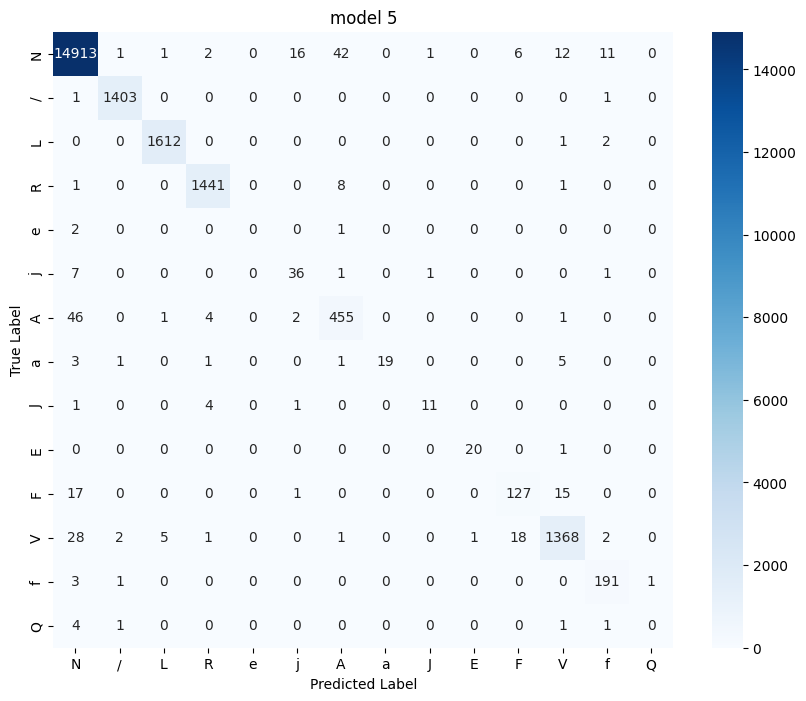

In [ ]:
nn_classifier(model5, test_loader, title="model 5")